## Ejercicios

Ignacio Vellido Expósito

In [1]:
import cv2

# Función para mostrar varias imágenes en una sola ventana
import numpy as np
from matplotlib import pyplot as plt

def plot_vector_img(vim, cols=0, titles=None, suptitle=None, gray=False):
    """ Visualiza varias imágenes a la vez """
    n_images = len(vim)

    if not cols:
        cols = 7 if len(vim) >= 7 else len(vim)

    if titles is None:
        titles = ['' for i in range(1, n_images+1)]

    if suptitle is None:
          suptitle = ''

    fig = plt.figure()
    for n, (image, title) in enumerate(zip(vim, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols, n+1)          
        plt.imshow(image, "gray" if gray else None)        

        a.set_title(title)        
        a.axis('off')    

    fig.suptitle(suptitle)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.subplots_adjust(bottom=0)

    plt.show()

Obtener para la imagen "fantastic_village.jpg" la imagen negada

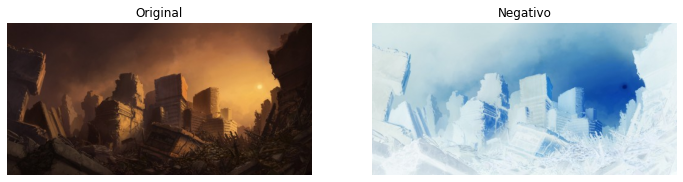

In [5]:
img = cv2.imread('fantastic_village.jpg')
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
negative = cv2.bitwise_not(original)

plot_vector_img([original, negative], titles=["Original", "Negativo"])

Obtener una imagen "blending" de las dos imágenes "fantastic_village.jpg" y "stars.jpg". Una imagen blending es sumar las dos imágenes pero ponderando previamente las imágenes originales por dos factores f1 y f2 tal que f1+f2=1.

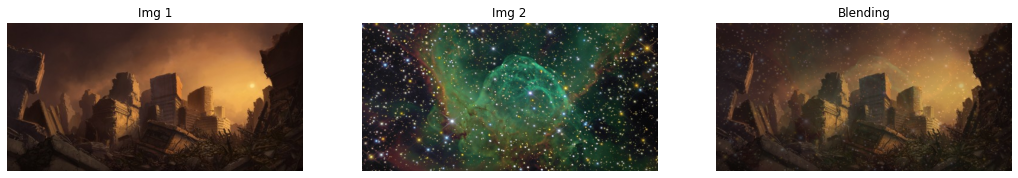

In [12]:
f1 = 0.8
f2 = 1 - f1

img1 = cv2.imread("fantastic_village.jpg")
img2 = cv2.imread("stars.jpg")

# Ajustar al mismo tamaño
width  = img2.shape[1]
height = img2.shape[0] 
dim    = (width, height)
  
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

# Blending
res = cv2.addWeighted(img1, f1, img2, f2, 0)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
res  = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plot_vector_img([img1, img2, res], titles=["Img 1", "Img 2", "Blending"])

Obtener la imagen and, or y xor de la imagen "fantastic_village.jpg" y "stars.jpg"

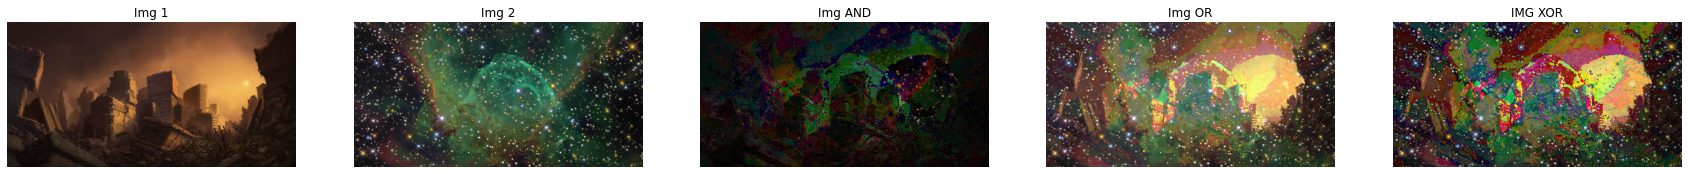

In [14]:
img1 = cv2.imread("fantastic_village.jpg")
img2 = cv2.imread("stars.jpg")

# Ajustar al mismo tamaño
width  = img2.shape[1]
height = img2.shape[0] 
dim    = (width, height)
  
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

# Operaciones lógicas
img_and = cv2.bitwise_and(img1, img2)
img_or  = cv2.bitwise_or(img1, img2)
img_xor = cv2.bitwise_xor(img1, img2)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_and = cv2.cvtColor(img_and, cv2.COLOR_BGR2RGB)
img_or  = cv2.cvtColor(img_or, cv2.COLOR_BGR2RGB)
img_xor = cv2.cvtColor(img_xor, cv2.COLOR_BGR2RGB)

plot_vector_img([img1, img2, img_and, img_or, img_xor], titles=["Img 1", "Img 2", "Img AND", "Img OR", "IMG XOR"])

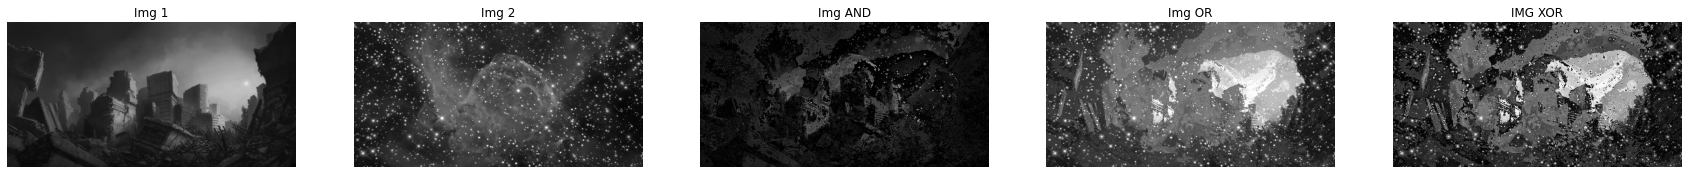

In [41]:
# En escala de grises
img1 = cv2.imread("fantastic_village.jpg", 0)
img2 = cv2.imread("stars.jpg", 0)

# Ajustar al mismo tamaño
width  = img2.shape[1]
height = img2.shape[0] 
dim    = (width, height)
  
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

# Operaciones lógicas
img_and = cv2.bitwise_and(img1, img2)
img_or  = cv2.bitwise_or(img1, img2)
img_xor = cv2.bitwise_xor(img1, img2)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_and = cv2.cvtColor(img_and, cv2.COLOR_BGR2RGB)
img_or  = cv2.cvtColor(img_or, cv2.COLOR_BGR2RGB)
img_xor = cv2.cvtColor(img_xor, cv2.COLOR_BGR2RGB)

plot_vector_img([img1, img2, img_and, img_or, img_xor], titles=["Img 1", "Img 2", "Img AND", "Img OR", "IMG XOR"], gray=True)

Obtener la funcion de transferencia $f(x)=sin(x*\pi/K)$. Para diferentes valores de k.Aplicar la función de transferencia a la imagen "dalmata.jpg"

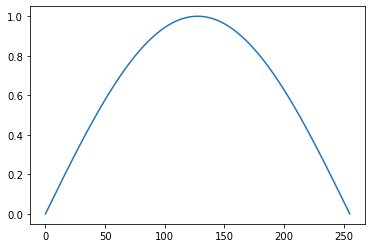

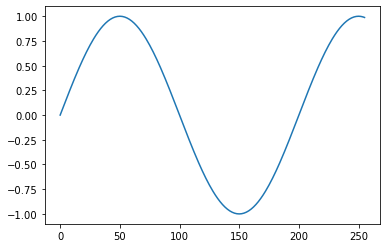

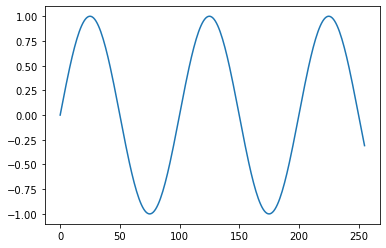

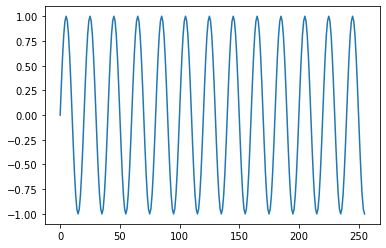

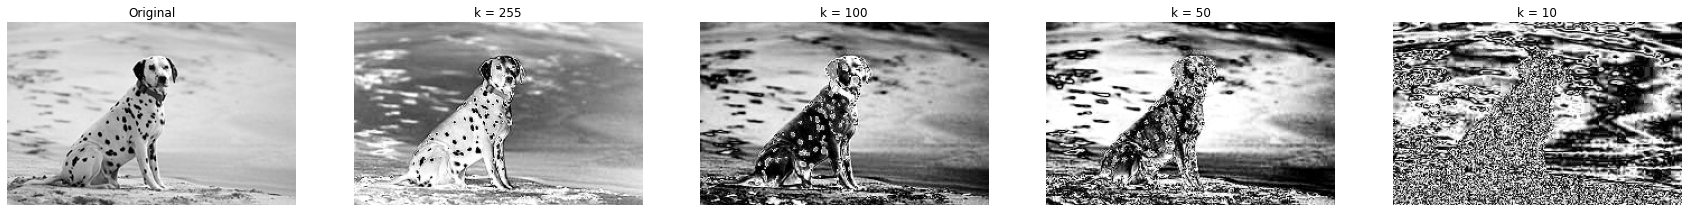

In [36]:
img = cv2.imread("dalmata.jpg", 0)

# Declarar función de transferencia
def funcion(img, k=1):
    ind = np.arange(256)
    func = np.sin(ind * np.pi / k)

    # Puesto que es una sinusoide no hace falta umbralizar
    # Los valores se devolverán en el rango [0,1]  
    
    plt.plot(ind,func)
    plt.show()

    return func[img]

# Aplicarla
img1 = funcion(img, 255)
img2 = funcion(img, 100)
img3 = funcion(img, 50)
img4 = funcion(img, 10)

plot_vector_img([img, img1, img2, img3, img4], titles=["Original", "k = 255", "k = 100", "k = 50", "k = 10"], gray=True)

Aplicar la transformada gamma sobre las imagenes "low_contrast2.jpg" y "low_contrast3.jpg". Comparar con los mejores resultados de aplicar la función imadjust.

In [42]:
def imadjust(img, In=(0,1.0), Out=(0,1.0), gamma=1.0):
    low_in,high_in = In
    low_out, high_out = Out
 
    low_in *= 255.0
    high_in *= 255.0
 
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (high_in - low_in)
         
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w), np.uint8)
    
    for r in range(h):
        for c in range(w):
            if img[r,c] <= low_in:
                imgOut[r,c] = low_out                
            elif img[r,c] > high_in:
                imgOut[r,c] = high_out
            else:
                res = int(k*(img[r,c]-low_in) + low_out)
                imgOut[r,c] = table[res]
               
    return imgOut 

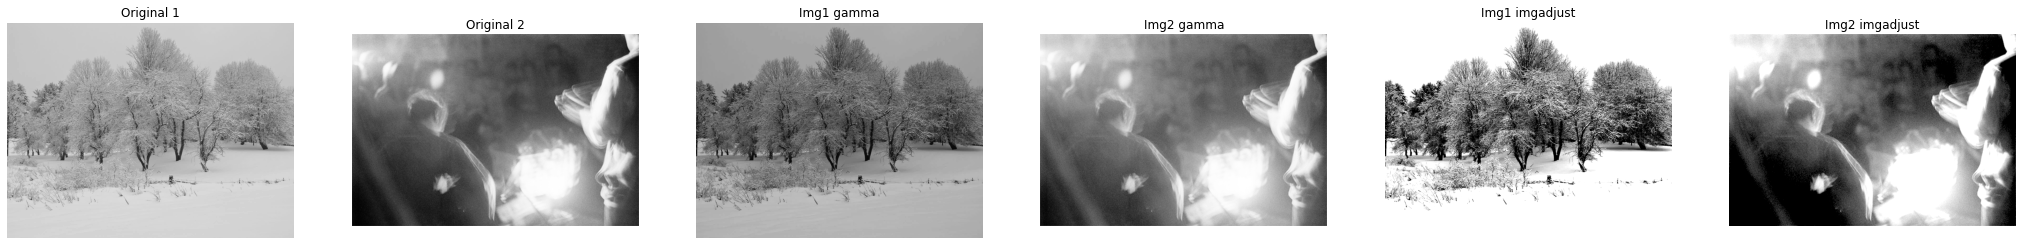

In [49]:
img1 = cv2.imread('low_contrast2.jpg', 0)
img2 = cv2.imread('low_contrast3.jpg', 0)

# Declarar función gamma
def gamma(img, g=0.01):    
    ind = np.arange(256)    
    fgamma = pow((ind/255),g)*255    

    return fgamma[img]

# Aplicar función gamma
gamma1 = gamma(img1, 2.0)
gamma2 = gamma(img2, 0.75)

adjust1 = imadjust(img1, (0.5,0.75), (0,1.0), .9)
adjust2 = imadjust(img2, (0.2,0.8), (0,1.0), .7)

# Mostrar resultados
plot_vector_img([img1, img2, gamma1, gamma2, adjust1, adjust2], titles=["Original 1", "Original 2", "Img1 gamma", "Img2 gamma", "Img1 imgadjust", "Img2 imgadjust"], gray=True)

Ecualizar la imagen "patio_leones.ppm"

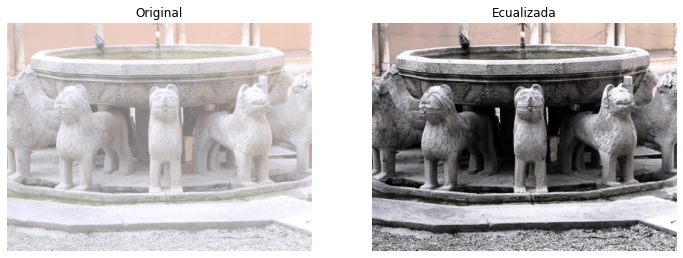

In [31]:
img = cv2.imread("patio_leones.ppm")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[:,:,2] = cv2.equalizeHist(img[:,:,2])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ecu = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)

plot_vector_img([img, ecu], titles=["Original", "Ecualizada"])

 
<b>Lo que oculta una imagen.</b> Estas dos imágenes
<table style="width: 390px; height: 266px;" border="0">        
<tr><td><a title="Original" href="castillo.pgm"><img src="castillo.png" width="256" height="256"></a>
    </td>    
    <td><a title="Imagen con otra imagen oculta"
        href="Castillo_oculto2bits.pgm"><img src="Castillo_oculto2bits.png" width="256" height="256"></a></td></tr>
</table>    
<p>A priori parecen la misma imagen. Sin embargo la imagen de la derecha oculta algo, en particular oculta una versión umbralizada de la  imagen de <img src="vacas.png" width="256" height="256"> vacas. </p>
<p>Dos posibles imágenes ocultas son:</p>
<table style="width: 390px; height: 266px;" border="0">
    <tbody>
        <tr>
            <td><a href="recuperada_castillo.pgm"><img src="recuperada_castillo.png" alt="imagen oculta" width="256" height="256"></a></td>
            <td><a href="recuperada_castillo2.pgm"><img src="recuperada_castillo2.png" width="256" height="256"></a></td>
        </tr>
    </tbody>
</table>
<p></p>
<p></p>
<p></p>
<p></p>
<p>Lo único que sabemos de esta imagen es que simplemente tienen 3 niveles de gris: 0 128 y 255 (imagen de la derecha de vacas). Podrian ser dos niveles tambien 0 252 (imagen de la izquierda de vacas). Explica como se ha ocultado la imagen de las vacas en
    el castillo y como se ha recuperado. Dar el código en Python para obtener la imagen oculta y también el código para ocultar la imagen vacas en el castillo.</p>
<p></p>
<p></p>

La imagen oculta está codificada en el último (o últimos) bit de la imagen resultante (steganography)

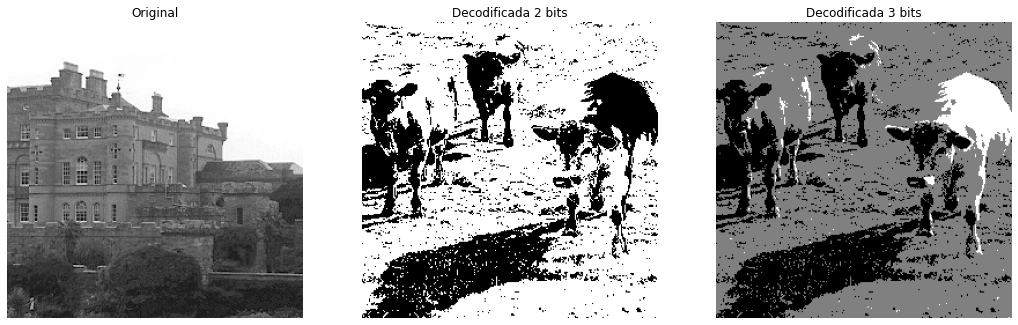

In [3]:
img = cv2.imread("castillo_oculto2bits.pgm", 0)

# Descodificar
def decode(img, bits=2):
    img_1 = cv2.bitwise_and(1, img)
    if bits == 2:
        return img_1
    else:
        return img_1 + cv2.bitwise_and(2, img)

dcd_2 = decode(img)
dcd_3 = decode(img, 3)

plot_vector_img([img, dcd_2, dcd_3], titles=["Original", "Decodificada 2 bits", "Decodificada 3 bits"], gray=True)

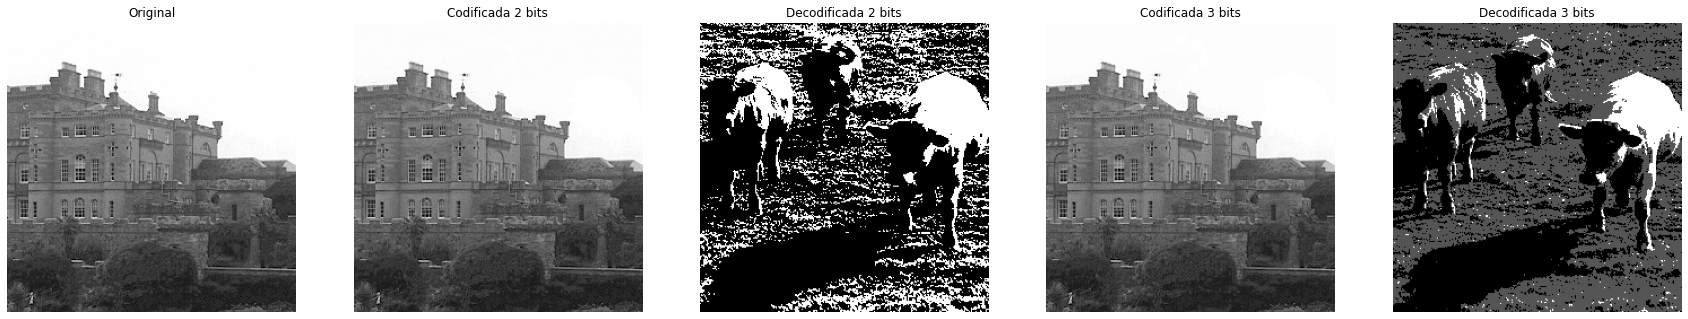

In [40]:
vacas = cv2.imread("vacas.pgm", 0)

# Codificar
def code(img, hidden, bits=2):
    # Umbralizar a 2 bits
    coded = 0
    if bits == 2:
        _, coded = cv2.threshold(hidden, 128, 1, cv2.THRESH_BINARY)
    else:
        _, coded_1 = cv2.threshold(hidden, 85, 1, cv2.THRESH_BINARY)
        _, coded_2 = cv2.threshold(hidden, 170, 2, cv2.THRESH_BINARY)

        coded = cv2.bitwise_or(coded_1, coded_2)

    # Quitarle el último(s) bit a la imagen original
    mask  = 254 if bits == 2 else 252
    aux = cv2.bitwise_and(mask, img)

    # Ajustar img oculta al tamaño de la original
    coded = cv2.resize(coded, img.shape, interpolation = cv2.INTER_AREA)

    # Aplicar máscara para codificar en el último bit
    return cv2.bitwise_or(aux, coded)


cd_2 = code(img, vacas)
dc_2 = decode(cd_2)

cd_3 = code(img, vacas, 3)
dc_3 = decode(cd_3, 3)

plot_vector_img([img, cd_2, dc_2, cd_3, dc_3], titles=["Original", "Codificada 2 bits", "Decodificada 2 bits", "Codificada 3 bits", "Decodificada 3 bits"], gray=True)